<a href="https://colab.research.google.com/github/HJ-Kurt-Su/ml-train/blob/main/cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df
# df["ans"] = iris["target"]
# df.to_csv("drive/My Drive/iris-k.csv", encoding="utf-8", index=False)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

x = np.array(df.drop(["ans"], axis=1))
y = np.array(df["ans"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


(120, 4)

In [5]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=3)
cluster.fit(iris["data"])
cluster.cluster_centers_
df["labels"] = cluster.labels_
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [9]:
from sklearn.metrics import silhouette_score

for k in range(2, 20):
  test = KMeans(n_clusters=k)
  test.fit(iris["data"])
  score = silhouette_score(iris["data"], test.labels_)
  print(score)


0.681046169211746
0.5528190123564091
0.4980505049972867
0.4887488870931048
0.36871053323330405
0.3588294450965675
0.35745369258527043
0.3396010373357636
0.3230610440132326
0.30368149359508795
0.30290720597867865
0.29478027950441466
0.31508524666815235
0.2829884490906102
0.28145032509634355
0.28345091568279673
0.28060320900031865
0.3124282479825913


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


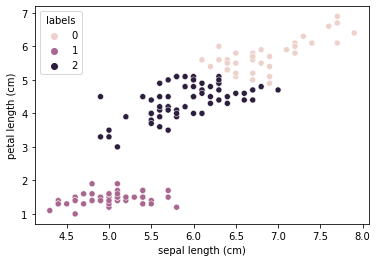

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(df["sepal length (cm)"],
        df["petal length (cm)"],
        hue=df["labels"])